$$
\frac{d \dot U}{dz} = \dot I \cdot \dot Z_1 
\\
\frac{d \dot I}{dz} = \dot U \cdot \dot Y_1
$$

$$
\dot Z_1 = R_1 + j \omega L_1 \quad
\dot Z_1 = R_1 + j X_{L_1}
\\
\dot Y_1 = G_1 + j \omega C_1 \quad
\dot Y_1 = G_1 + j X_{C_1}
$$

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Параметры линии в системе СИ
r = 0.001 # Радиус провода в м
d = 0.02 # Расстояние между проводами в м
eps = 1
lmbd = 0.600 # в м
f = 3e8 / lmbd # в ГЦ

# Погонные параметры
C1 = 12.1 * eps * np.log10(d/r) # пФ/м
L1 = 0.92 * np.log10(d/r) # мкГн/м
R1 = 1.44 / ((r*1000)*np.sqrt(lmbd)) # Ом/м
# R1 = 1. # Ом/м
G1 = 0
W = (276 / np.sqrt(eps)) * np.log10(d/r) # Ом


def Z1(z):
  return R1 + 1j * (2 * np.pi * f) * L1 * 10**(-6)

def Y1(z):
  return G1 + 1j * (2 * np.pi * f) * C1 * 10**(-12)


W1 = np.sqrt(Z1(0)/Y1(0))
print(W, W1)

359.0842788032588 (275.74093366255954-0.06816054855540325j)


In [54]:
# Метод Рунге-Кутта 4 порядка

def frange(start, stop, step):
  while start < stop:
    yield float(start)
    start += step

def Compute(df, x_max, dx, y_start = 0, x_min = 0):
  y = y_start
  res_x = [x_min]
  res_y = [y_start]
  for x in frange(x_min, x_max, dx):
    k1 = df(x,        y)
    k2 = df(x + dx/2, y + dx * k1/2)
    k3 = df(x + dx/2, y + dx * k2/2)
    k4 = df(x + dx,   y + dx * k3)  
    y += (k1 + 2*k2 + 2*k3 + k4) * dx / 6
    res_x.append(x+dx)
    res_y.append(y.copy())
  return (res_x, res_y)

In [55]:
# Телеграфные уравнения
def TelegrafEq(z, UI):
  return np.array([
                   UI[1]*Z1(z),
                   UI[0]*Y1(z)
  ])

In [72]:
XX = Compute(TelegrafEq, 1*lmbd, 0.001, [1., 0.]) #Холостой ход (линия разомкнута) передаём последним параметром значение напряжения и нулевой ток
KZ = Compute(TelegrafEq, 1*lmbd, 0.001, [0., 2.]) #КЗ (линия замкнута) передаём последним параметром значение нулевого напряжения и ток

z_XX = XX[0]
UI_XX = np.array(XX[1])
U_XX = UI_XX.transpose()[0]
I_XX = UI_XX.transpose()[1]
Zin_XX = U_XX/I_XX

z_KZ = KZ[0]
UI_KZ = np.array(KZ[1])
U_KZ = UI_KZ.transpose()[0]
I_KZ = UI_KZ.transpose()[1]
Zin_KZ = U_KZ/I_KZ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(-1149.0696921704282, 1149.0696921704282)

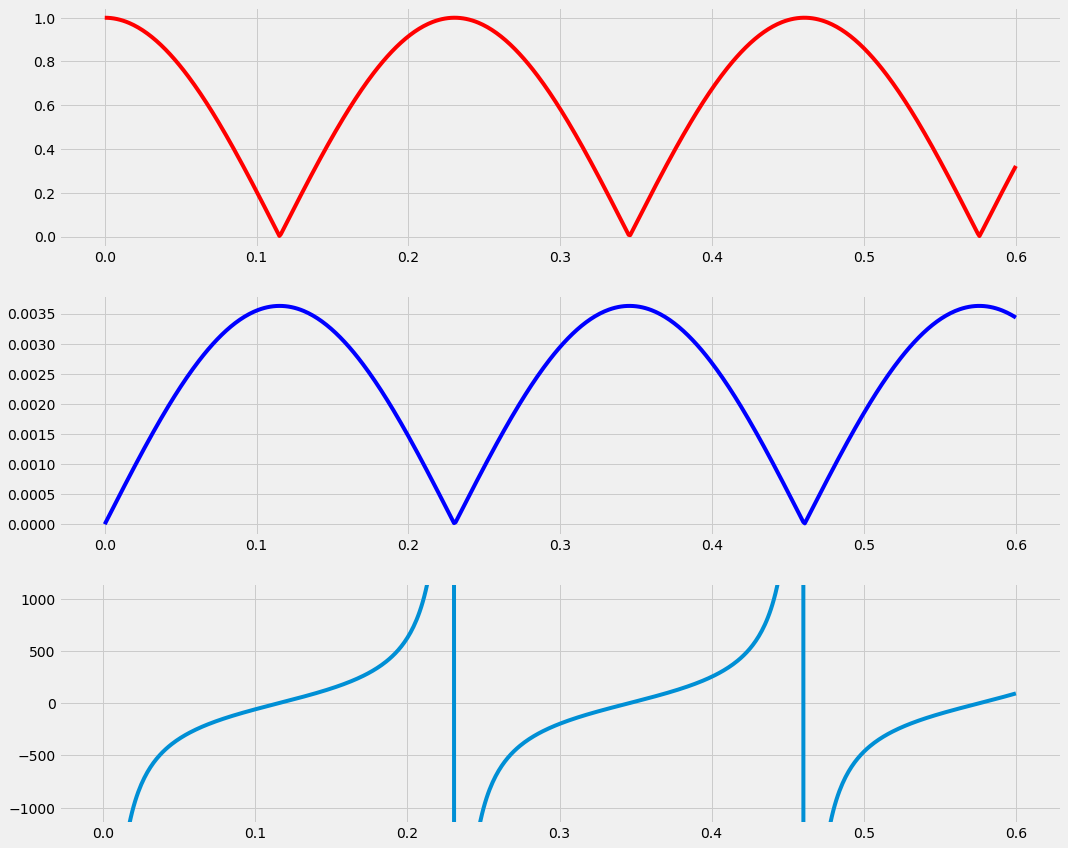

In [67]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(3, 1, figsize=(16, 14))
ax[0].plot(z_XX, abs(U_XX), 'r')
ax[1].plot(z_XX, abs(I_XX), 'b')
ax[2].plot(z_XX, np.imag(Zin_XX))
ax[2].set_ylim(ymin=-3.2*W, ymax=3.2*W)

(-1149.0696921704282, 1149.0696921704282)

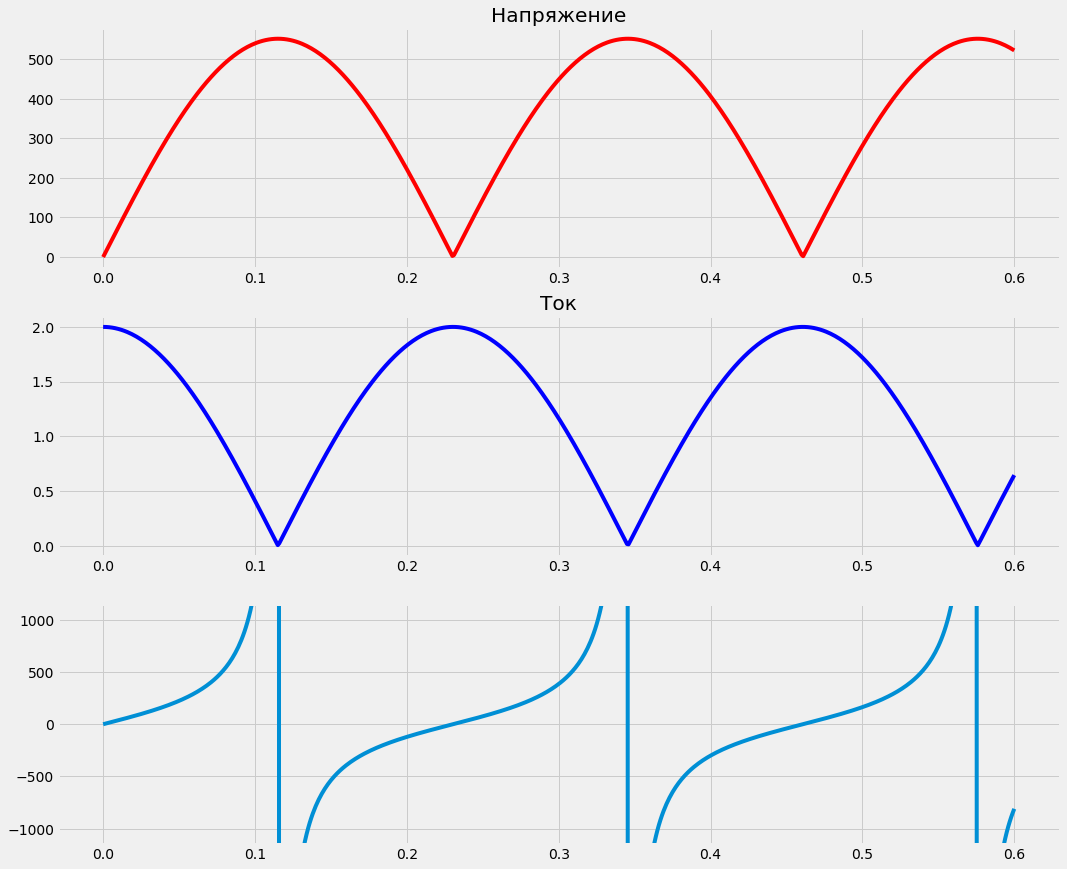

In [73]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(3, 1, figsize=(16, 14))
ax[0].plot(z_KZ, abs(U_KZ), 'r')
ax[0].set_title("Напряжение")
ax[1].plot(z_KZ, abs(I_KZ), 'b')
ax[1].set_title("Ток")
ax[2].plot(z_KZ, np.imag(Zin_KZ))
ax[2].set_ylim(ymin=-3.2*W, ymax=3.2*W)

(-538.6264182048883, 538.6264182048883)

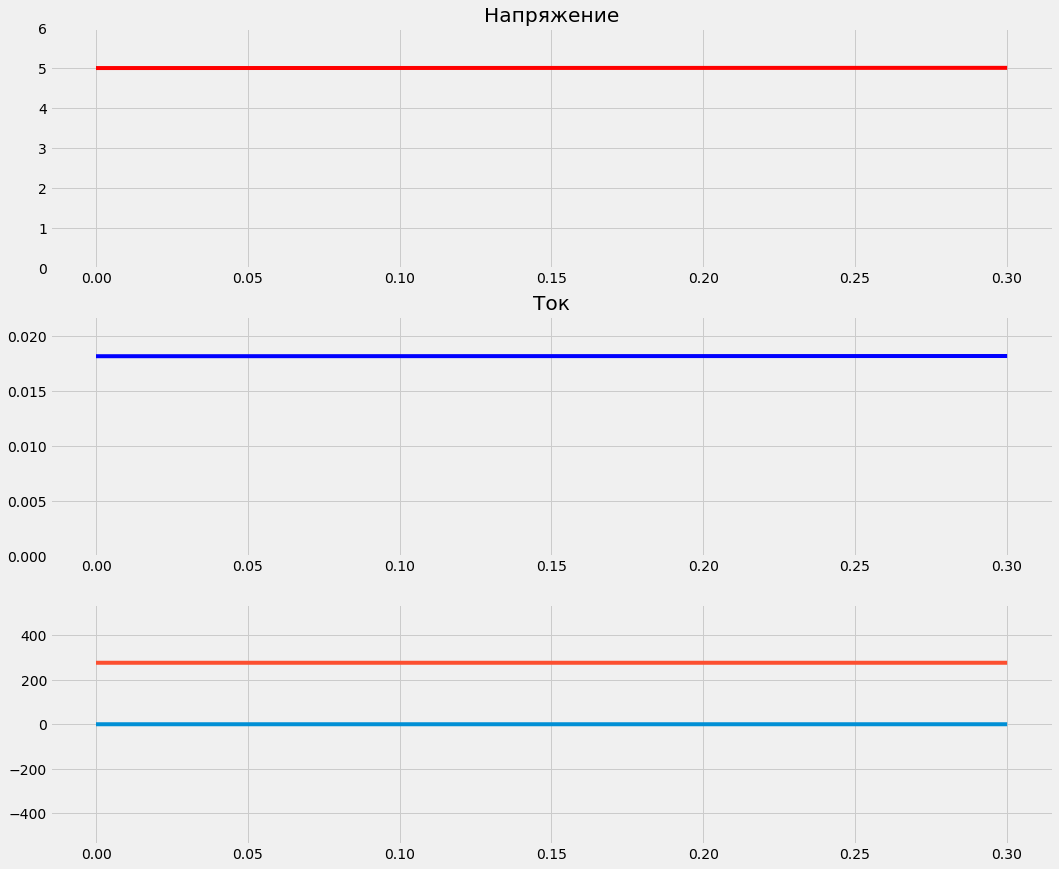

In [103]:
Un = 5
Zn = 1.0 * W1
In = Un/Zn

S = Compute(TelegrafEq, 0.5*lmbd, 0.0001, [Un, In]) # произвольное активное сопротивление

z_S = S[0]
UI_S = np.array(S[1])
U_S = UI_S.transpose()[0]
I_S = UI_S.transpose()[1]
Zin_S = U_S/I_S

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(3, 1, figsize=(16, 14))
ax[0].plot(z_S, abs(U_S), 'r')
ax[0].set_ylim(ymin = 0, ymax = 1.2*max(abs(U_S)))
ax[0].set_title("Напряжение")
ax[1].plot(z_S, abs(I_S), 'b')
ax[1].set_ylim(ymin = 0, ymax = 1.2*max(abs(I_S)))
ax[1].set_title("Ток")
ax[2].plot(z_S, np.imag(Zin_S), z_S, np.real(Zin_S))
ax[2].set_ylim(ymin=-1.5*W, ymax=1.5*W)